# Nuclear Calculations

This notebook can be used for all types of nuclear calculations.  It uses the [AME2016](https://www-nds.iaea.org/amdc/) dataset for accurate mass values.

## Getting started

The first thing to do is to run the cell directly below this one to load the data from the server.

In [29]:
from NuclearData import NuclearData
nd = NuclearData(accurate=False)
from collections import namedtuple
Nucleus = namedtuple('Nucleus', ['A', 'Z'])

Now that the data is in the notebook you can use it to perform calcuations.  I have used the physical constants in the [OCR Physics A databook](https://www.ocr.org.uk/Images/363796-units-h156-and-h556-data-formulae-and-relationships-booklet.pdf).  However, if you want to be super accurate you can rerun the cell above with the option:  

```
nd = NuclearData(accurate=True)
```

You can see the constants at any time by running the cell below.

In [30]:
nd.printConstants()

----------------------------------------------------
Quantity                            Value         
----------------------------------------------------
AMU                                 1.661e-27     
mass of electron /u                 5.485e-04     
mass of proton / u                  1.0072        
mass of neutron / u                 1.0084        
speed of light / m/s                3.00e+08      
electron charge / C                 1.60e-19      
amu to MeV                          934.313       
----------------------------------------------------


## Getting nuclear data

To see the data for a particular atom just enter the A and Z values as in the next cell and press run. 

In [31]:
nd.printTableAll(Nucleus(218,84))

----------------------------------------------------
Quantity                            Value         
----------------------------------------------------
Element                             Po            
Proton Number                       84            
Nucleon Number                      218           
Neutron Number                      134           
Atomic Mass / u                     218.00897150  
Atomic Mas / kg                     3.6211290166e-25
Nuclear Mass / u                    217.96289750  
Nuclear Mass / kg                   3.62036373e-25
Mass Defect / u                     1.76750250    
Mass Defect / kg                    2.93582165e-27
Binding Energy / MeV                1651.39967766 
Binding Energy / J                  2.64223948e-10
Binding Energy per Nucleon / MeV    7.57522788    
Binding Energy per Nucleon / J      1.21203646e-12
----------------------------------------------------


You can show the binding energy per nucleon from the data set and the total binding energy.

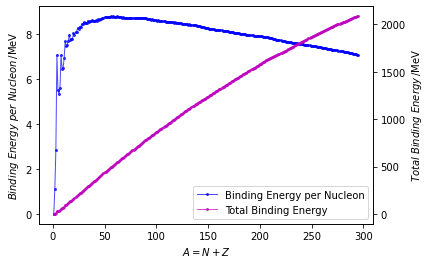

In [32]:
nd.printGraph()

Here's some more data, this time for Thorium-228

In [33]:
nd.printTable(Nucleus(A=228, Z=90))

----------------------------------------------------
Quantity                            Value         
----------------------------------------------------
Element                             Th            
Proton Number                       90            
Nucleon Number                      228           
Neutron Number                      138           
Atomic Mass / u                     228.02873984  
Nuclear Mass / u                    227.97937484  
Mass Defect / u                     1.82782517    
Binding Energy / MeV                1707.75989947 
Binding Energy per Nucleon / MeV    7.49017500    
----------------------------------------------------


## Nuclear decay energies

You can also calculate alpha and beta decay energies.  Here's the energy released by the decay of Thorium-228 and Bismuth-210.

In [34]:
nd.printAlphaEnergyReleaseMeV(Nucleus(A=228, Z=90))

Energy Release (MeV) = -5.5369       


In [35]:
nd.printBetaEnergyReleaseMeV(Nucleus(A=210, Z=83))

Energy Release (MeV) = -1.1647       


It will calculate the alpha particle energy and speed too.

In [36]:
nd.printAlphaEnergyMeV(Nucleus(A=228, Z=90))

Alpha KE (MeV) = 5.4397        


In [37]:
nd.printAlphaEnergyJ(Nucleus(A=228, Z=90))

Alpha KE (J) = 8.7035e-13    


In [38]:
nd.printAlphaSpeed(Nucleus(A=228, Z=90))

Alpha Speed (m/s) = 1.6183e+07    


For beta particles the speed has to be calculated from relativistic equations, so this might not be one to get pupils to do.


In [39]:
nd.printBetaEnergyMeV(Nucleus(A=210, Z=83))

Beta KE (MeV) =  1.1647        


In [40]:
nd.printBetaSpeed(Nucleus(A=210, Z=83))

Beta Speed (m/s) =  2.8565e+08    


I have not documented all of the functions but the source can be found [Here](https://github.com/martynwheeler/MartynsBinders/blob/main/Nuclear/NuclearData.py).  I will add some more documentation when I have time.

## Fission Reaction Example

Induced fission of Uranium-235 into Krypton-90 + Barium-144 and two neutrons

First, do it with atomic masses:

In [41]:
parentNuc = Nucleus(A=238,Z=92)
daughterNuc1 = Nucleus(A=95,Z=38)
daughterNuc2 = Nucleus(A=140,Z=54)
nd.getFissionEnergyReleaseMEV(parentNuc, daughterNuc1, daughterNuc2)

-172.4603895444459

## Fusion Reaction Example

Induced fusion of four protons to form Helium-4 

In [42]:
reactants = [Nucleus(A=1,Z=1),Nucleus(A=1,Z=1),Nucleus(A=1,Z=1), Nucleus(A=1,Z=1), Nucleus(A=0,Z=-1), Nucleus(A=0,Z=-1)]
products = [Nucleus(A=4, Z=2)]
nd.getFusionEnergyReleaseMEV(reactants, products)

-26.5258287506647